In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.linear_model import LogisticRegression
import random as rand
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, LogisticRegression,PassiveAggressiveRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_regression, mutual_info_classif, f_regression
from sklearn.metrics import accuracy_score, log_loss
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, PassiveAggressiveRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import GradientBoostingRegressor
#training perpose
x1 = [rand.randint(1,1000) for i in range(1,10000)]
x2 = [rand.randint(1,1000) for i in range(1,10000)]
x3 = [rand.randint(1,1000) for i in range(1,10000)]
x4 = [rand.randint(1,1000) for i in range(1,10000)]
x5 = [rand.randint(1,1000) for i in range(1,10000)]
#print(x2)
y = [x1[i]+x2[i]+x3[i]+x4[i]+x5[i] for i in range(len(x1))]
#print(y)
x_tr = list(zip(x1,x2,x3,x4,x5))
#print(x_tr)
#testing perpose

xt = [rand.randint(1,1000) for i in range(1,1000)]
xt1 = [rand.randint(1,100) for i in range(1,1000)]
xt2 = [rand.randint(1,100) for i in range(1,1000)]
xt3 = [rand.randint(1,100) for i in range(1,1000)]
xt4 = [rand.randint(1,100) for i in range(1,1000)]
x_te = list(zip(xt,xt1,xt2,xt3,xt4))
yt = [xt[i]+xt1[i]+xt2[i]+xt3[i]+xt4[i] for i in range(len(xt))]
#print(yt)





X_train, X_test, y_train, y_test = train_test_split(x_tr, y, test_size=1/3, random_state=0)



#GradientBoostingRegressor
regressorGB = GradientBoostingRegressor(
    max_depth=5,
    n_estimators=10,
    learning_rate=0.85
)
regressorGB.fit(X_train, y_train)
errors = [mean_squared_error(y_test, y_pred) for y_pred in regressorGB.staged_predict(X_test)]
best_n_estimators = np.argmin(errors)
res = regressorGB.score(X_train, y_train)
print('training score: ',res*100)
y_predGB = regressorGB.predict(X_test)
GBrmse = (mean_squared_error(y_test, y_predGB))**0.5
print(GBrmse)

#for i in range(0,50):
    #print(y_test[i],' ',y_predGB[i])


res = regressorGB.score(x_te, yt)
print('testing score: ',res*100)
y_predGB = regressorGB.predict(x_te)
GBrmse = (mean_squared_error(yt, y_predGB))**0.5
print('--',GBrmse)

#for i in range(len(yt)):
    #print(yt[i],' ',y_predGB[i])
    
    
#DecisionTreeRegressor
    
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressorTree = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressorTree.fit(X_train, y_train) 
res = regressorTree.score(X_train, y_train)
print('training score Dt: ',res*100)
y_pred_tree = regressorTree.predict(X_test)
DTRrmse = (mean_squared_error(y_test, y_pred_tree))**0.5
print('Loss: ',DTRrmse)
#for i in range(0,50):
    #print(y_test[i],' ',y_pred_tree[i])


res = regressorTree.score(x_te, yt)
print('testing score Dt: ',res*100)
y_pred_tree = regressorTree.predict(x_te)
DTRrmse = (mean_squared_error(yt, y_pred_tree))**0.5
print('Loss: ',DTRrmse)
#for i in range(len(y_pred_tree)):
    #print(yt[i],' ',y_pred_tree[i])


training score:  96.19648012158034
152.64337363504555
testing score:  23.514093942513693
-- 263.30940128766866
training score Dt:  100.0
Loss:  200.8165076057561
testing score Dt:  -33.34809815941517
Loss:  347.6714835307326


In [16]:
scaler = StandardScaler()
scaler.fit(x_tr)
train = scaler.transform(x_tr)
scaler.fit(x_te)
test = scaler.transform(x_te)
y = np.asarray(y)
y = y.reshape(-1,1)
scaler.fit(y)
y = scaler.transform(y)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=1/3, random_state=0)

In [18]:
passref = PassiveAggressiveRegressor(max_iter=1000000,early_stopping=False,n_iter_no_change=1000,shuffle=True,)
passref.fit(X_train, y_train)
res = passref.score(X_train, y_train)
print(res*100)
y_pred = passref.predict(X_test)
a = mean_squared_error(y_test, y_pred)
rmse = a
rmse

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


99.90398504273995


0.0009711571941055561

In [19]:
yt = np.asarray(yt)
yt = yt.reshape(-1,1)
scaler.fit(yt)
yt = scaler.transform(yt)

In [20]:
res = passref.score(test, yt)
print(res*100)
y_pred = passref.predict(test)
a = mean_squared_error(yt, y_pred)
a

17.48354017637821


0.8251645982362178

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


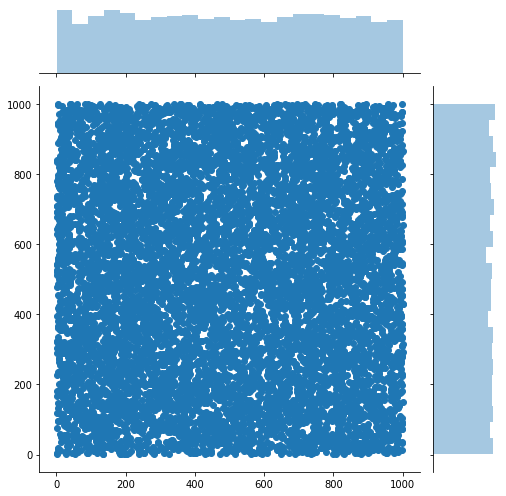

In [23]:
g = sns.jointplot(x1, x2, kind="scatter", size=7)
#plt.savefig('graph.png')
plt.show()